In [11]:
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.utils import np_utils
%matplotlib inline
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import cv2

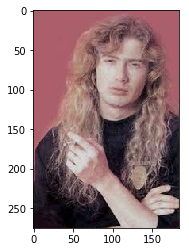

In [2]:
model_dir = 'da_last4_layers.h5'
image_dir = '../male_female_cnn/examples/dave.jpeg'

image = cv2.imread(image_dir)
plt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

In [14]:
vggmodel = VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

vggmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model = Sequential()

for layer in vggmodel.layers[:-1]:
    model.add(layer)


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [7]:
model.add(Dense(2, activation='softmax', name='predictions'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [9]:
for layer in model.layers[:-8]:
    layer.trainable = False


In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(lr=1e-5),
    metrics=['acc']
)


In [ ]:
# https://datascience.stackexchange.com/questions/20469/keras-visualizing-the-output-of-an-intermediate-layer
# https://github.com/yashk2810/Visualization-of-Convolutional-Layers/blob/master/Visualizing%20Filters%20Python3%20Theano%20Backend.ipynb
# https://www.youtube.com/watch?v=oDHpqu52soI # deep lizard - fine tuning
# https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59
# heatmaps with custom model